In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(42)


n_samples = 100

# Generate feature 1: Hours worked per day (range: 4-12 hours)
hours_worked = np.random.uniform(4, 12, n_samples)

# Generate feature 2: Experience level (years, range: 0-15 years)
experience_years = np.random.uniform(0, 15, n_samples)


hours_effect = -0.5 * (hours_worked - 8.5)**2 + 5  # Peak productivity around 8-9 hours


experience_effect = 3 * np.log(experience_years + 1)


interaction_effect = 0.1 * hours_worked * np.log(experience_years + 1)


noise = np.random.normal(0, 1, n_samples)


productivity = hours_effect + experience_effect + interaction_effect + noise


productivity = np.clip(productivity, 0, 10)


data = pd.DataFrame({
    'Daily_Working_Hours': hours_worked,
    'Screen_Time': experience_years,
    'Productivity_Score': productivity
})

x_fake = data.drop("Productivity_Score", axis=1)
y_fake = data['Productivity_Score']

print("Sample data (first 10 rows):")
print(data.head(10))


print("\nBasic statistics:")
print(data.describe())


print("\nCorrelation matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)










Sample data (first 10 rows):
   Daily_Working_Hours  Screen_Time  Productivity_Score
0             6.996321     0.471438            4.618396
1            11.605714     9.546156           10.000000
2             9.855952     4.715340           10.000000
3             8.789268     7.628560           10.000000
4             5.248149    13.613497           10.000000
5             5.247956     3.739383            5.670193
6             4.464669     6.155744            2.449103
7            10.929409    11.333267           10.000000
8             8.808920     3.431972            9.755648
9             9.664581     1.154699            8.153816

Basic statistics:
       Daily_Working_Hours  Screen_Time  Productivity_Score
count           100.000000   100.000000          100.000000
mean              7.761446     7.467476            8.081673
std               2.379915     4.396669            2.754900
min               4.044177     0.104282            0.000000
25%               5.545606     3.630

In [38]:
data = pd.read_csv("global_remote_work_wellbeing.csv")
print(data.head())

  Employee_ID  Daily_Working_Hours  Screen_Time  Meetings_Attended  \
0      E00001                  7.0          5.6                  5   
1      E00002                 11.6          5.3                  1   
2      E00003                  9.9          4.2                  3   
3      E00004                  8.8          7.3                  4   
4      E00005                  5.2          6.3                  4   

   Emails_Sent  Productivity_Score  Stress_Level  Physical_Activity_Steps  \
0           30                   3             5                    11501   
1           30                   5             6                     5742   
2           21                   8             4                     4852   
3           99                   1             9                    11928   
4           87                   2             3                     7665   

   Sleep_Duration  Work_Life_Balance_Satisfaction  
0             5.8                               4  
1           

In [39]:
x_real = data[["Daily_Working_Hours", "Screen_Time"]]
y_real = data["Productivity_Score"]
print(x_real)
print(y_real)

      Daily_Working_Hours  Screen_Time
0                     7.0          5.6
1                    11.6          5.3
2                     9.9          4.2
3                     8.8          7.3
4                     5.2          6.3
...                   ...          ...
9995                 10.9          9.1
9996                 11.2          3.3
9997                 11.6          5.1
9998                  7.2          6.1
9999                  5.7          4.2

[10000 rows x 2 columns]
0       3
1       5
2       8
3       1
4       2
       ..
9995    3
9996    6
9997    1
9998    8
9999    2
Name: Productivity_Score, Length: 10000, dtype: int64


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(X_fake)
X_fake_scaled = scaler.transform(x_fake)
X_real_scaled = scaler.transform(x_real)

Epoch 1/100 - MSE: 69.7023, MAE: 8.0817
Epoch 11/100 - MSE: 47.7709, MAE: 6.6033
Epoch 21/100 - MSE: 33.1310, MAE: 5.4140
Epoch 31/100 - MSE: 23.3585, MAE: 4.4641
Epoch 41/100 - MSE: 16.8349, MAE: 3.7158
Epoch 51/100 - MSE: 12.4802, MAE: 3.1437
Epoch 61/100 - MSE: 9.5733, MAE: 2.7131
Epoch 71/100 - MSE: 7.6328, MAE: 2.4012
Epoch 81/100 - MSE: 6.3375, MAE: 2.1785
Epoch 91/100 - MSE: 5.4728, MAE: 2.0068
Epoch 100/100 - MSE: 4.9434, MAE: 1.8917

Final weights: [1.50033976 1.34696716]
Final bias: 7.009885509161657


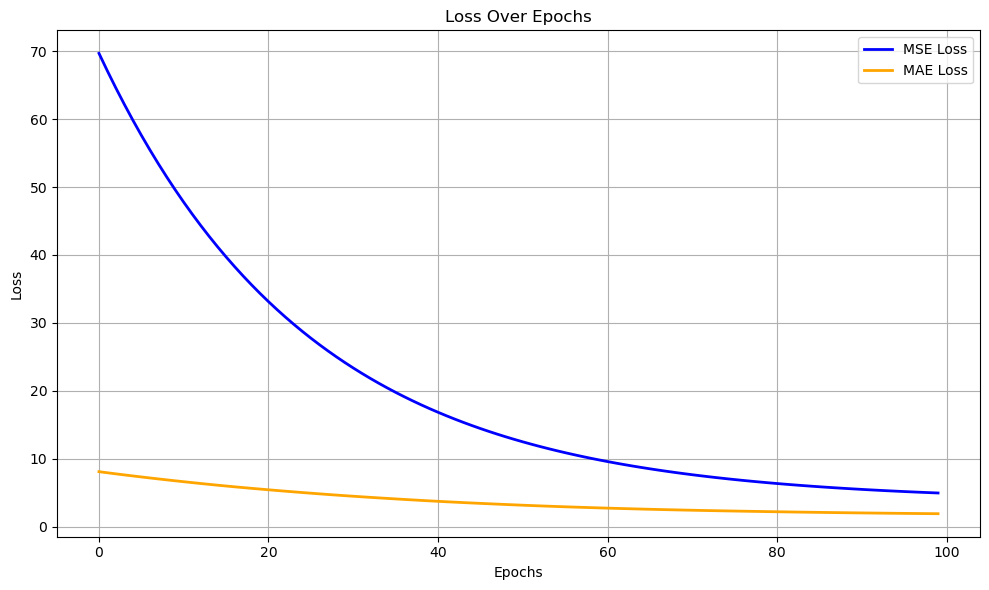

In [42]:
global weights, bias
weights = np.random.randn(2)
bias = 0.0

# Hyperparameters
learning_rate = 0.01
epochs = 100

# Store loss values
mse_history = []
mae_history = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = X_fake_scaled @ weights + bias

    # Loss computation
    mse_loss = np.mean((y_fake - y_pred) ** 2)
    mae_loss = np.mean(np.abs(y_fake - y_pred))

    # Save losses
    mse_history.append(mse_loss)
    mae_history.append(mae_loss)

    # Gradients for MSE
    error = y_pred - y_fake
    grad_weights = (2 / len(X_fake_scaled)) * (X_fake_scaled.T @ error)
    grad_bias = (2 / len(X_fake_scaled)) * np.sum(error)

    # Gradient descent update
    weights -= learning_rate * grad_weights
    bias -= learning_rate * grad_bias

    # Logging
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch+1}/{epochs} - MSE: {mse_loss:.4f}, MAE: {mae_loss:.4f}")

# Final weights
print("\nFinal weights:", weights)
print("Final bias:", bias)

# 🎨 Plotting the Loss
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), mse_history, label='MSE Loss', color='blue', linewidth=2)
plt.plot(range(epochs), mae_history, label='MAE Loss', color='orange', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def predict(X_new):
    global weights, bias
    return X_new @ weights + bias

y_real_pred = predict(X_real_scaled)

mae = mean_absolute_error(y_real, y_real_pred)
mse = mean_squared_error(y_real, y_real_pred)

print("MSE: \n", mse)
print("MAE: \n", mae)



MSE: 
 12.518956161575499
MAE: 
 2.916110737653642


In [45]:
#answer to the questions
# Q1: How does normalization affect the feature values?
# Normalization centers features around 0 with unit variance, improving gradient descent stability and speed.

# Q2: Why does MSE penalize larger errors more than MAE?
# MSE squares errors, making large deviations more impactful than MAE which treats all errors linearly.

# Q3: How does the learning rate affect convergence?
# A small learning rate slows convergence; a large one may overshoot or diverge.

# Q4: Why might the model perform differently on real vs. synthetic data?
# Real data has more noise, complexity, and unmodeled patterns, making it harder to fit than clean synthetic data.

# Q5: How does the choice of cost function (MSE vs. MAE) affect optimization?
# MSE is smoother and differentiable everywhere, favoring gradient descent; MAE is robust to outliers but less smooth.

# Q6: What challenges arise when scaling to multiple features?
# Features on different scales may dominate training; also, model complexity increases, requiring more data and computation.

# Q7: How does gradient descent compare to scikit-learn's built-in linear regression?
# Gradient descent is iterative and tunable; scikit-learn uses a closed-form solution (least squares) that's faster and more stable for small datasets.
